<a href="https://colab.research.google.com/github/muddamjatin/DAA-Hands-on-3/blob/main/DAA_HandsOn_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.) Implementing two versions of QuickSort:

Non-Random Pivot QuickSort: Assign the pivot to the first element.

Random Pivot QuickSort: Choose a pivot element at random from the array


In [7]:
import random
import time
import matplotlib.pyplot as plt

# Non-random pivot QuickSort implementation
def quicksort_non_random(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[0]
    less = [x for x in arr[1:] if x <= pivot]
    greater = [x for x in arr[1:] if x > pivot]
    return quicksort_non_random(less) + [pivot] + quicksort_non_random(greater)

# Random pivot QuickSort implementation
def quicksort_random(arr):
    if len(arr) <= 1:
        return arr
    pivot = random.choice(arr)
    less = [x for x in arr if x < pivot]
    equal = [x for x in arr if x == pivot]
    greater = [x for x in arr if x > pivot]
    return quicksort_random(less) + equal + quicksort_random(greater)


2.) Now for Benchmarking :

2a)Best case

2b)Worst case

2c)Average case

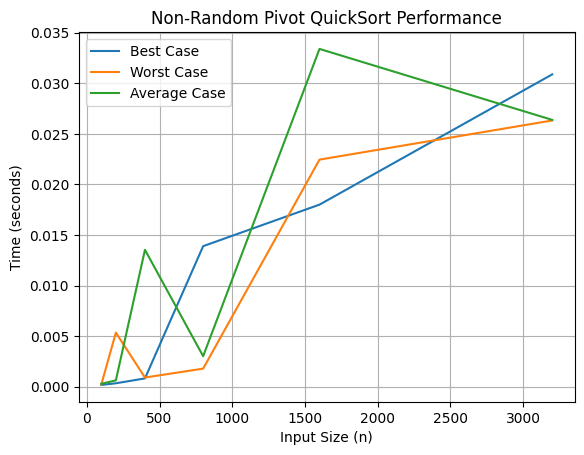

In [12]:
import numpy as np

# Function to benchmark sorting algorithms
def benchmark_quicksort(quicksort_fn, input_generator, n_values):
    times = []
    for n in n_values:
        arr = input_generator(n)
        start = time.time()
        quicksort_fn(arr)
        end = time.time()
        times.append(end - start)
    return times

# Best case input generator (sorted array)
def best_case_input(n):
    return list(range(n))

# Worst case input generator (reverse sorted array)
def worst_case_input(n):
    return list(range(n, 0, -1))

# Average case input generator (random array)
def average_case_input(n):
    return list(np.random.randint(0, n, size=n))

# Benchmark non-random pivot QuickSort for different cases
n_values = [100, 200, 400, 800, 1600, 3200]

best_case_times = benchmark_quicksort(quicksort_non_random, best_case_input, n_values)
worst_case_times = benchmark_quicksort(quicksort_non_random, worst_case_input, n_values)
average_case_times = benchmark_quicksort(quicksort_non_random, average_case_input, n_values)

# Plot the results
plt.plot(n_values, best_case_times, label="Best Case")
plt.plot(n_values, worst_case_times, label="Worst Case")
plt.plot(n_values, average_case_times, label="Average Case")
plt.xlabel("Input Size (n)")
plt.ylabel("Time (seconds)")
plt.title("Non-Random Pivot QuickSort Performance")
plt.legend()
plt.grid(True)
plt.show()


3.) Mathematically deriving the average runtime complexity of the non-random pivot version of quicksort.

Derivation of Time Complexity:

The degree to which the pivot partitions the array at each stage determines the QuickSort's runtime complexity.

Best Case: Every recursive step splits the array into two equal pieces, resulting in a temporal complexity of 𝑂 (𝑛 log ⁡𝑛).

Worst Case: The array is divided into two parts, one of which is empty and contains every element, resulting in a time complexity of 𝑂 (𝑛^2).

For the average case of QuickSort:

Two subarrays, one of size 𝑼 i and the other of size 𝑛 − 𝑖, where 𝑖 is evenly distributed, are created by partitioning the array.

The recurrence relation provides the estimated number of comparisons: [n−1∑i=0(T(i)+T(n−1−i))]

The average temporal complexity of this recurrence is 𝑂 (𝑛 log 𝑛 ).

Since the splits are typically well-balanced due to the average case's random pivot, the 𝑂 (𝑛 log ⁡ 𝑛) complexity holds as expected.